
# DIGITAL IMAGE PROCESSING IN THE SPACE-FREQUENCY DOMAIN

## THE 1D WIGNER DISTRIBUTION AS TOOL FOR IMAGE ANALYSING  

**@author: Salvador Gabarda**

**salvador@optica.csic.es**

**This notebook includes Python functions for digital image processing based on the Wigner distribution. Applications based on this approach may be found in**  

https://scholar.google.es/citations?user=jPzi3LEAAAAJ&hl=es&oi=ao

*Created on Nov  7  2017 - Reviewed Dec 27 2019*


**Image analysis based on the 1D local-directional Wigner distribution** 

The analysis of digital images can be performed through the local frequency information they enclose. The task of gathering such local spatial-frequency information can be fulfilled by the use of one of the existing space/space-frequency image representations. One of the most popular space-frequency (SF) representations is the Wigner distribution (WD) [1].  The WD has been approximated for discrete signals under the name of  pseudo-Wigner distribution (PWD) and it has been mathematically defined as [2,3]

### $W(n,k)=2 \sum\limits_{m= -\frac{N}{2}}^{\frac{N}{2}-1} z(n+m)z^*(n-m) e^{-i2 \pi k \left(\frac{2m}{N} \right) }$   (1)

                 
In Eq.(1) the variable $z(n)$ represents the gray value of pixel $n$ in a given image $z$. A directional PWD may be calculated by using this equation in a tilted 1D pixel-by-pixel sliding window $L_{\theta}$  conforming a string of values $z=z(-N/2), ..., z(0), ..., z(N/2)$. The central position of the window matches exactly pixel $n$ on the image. Eq.(1) can be interpreted as the discrete Fourier transform (DFT) of the product  $r(n,m)= z(n+m)z^*(n-m)$. Here $z^*$ indicates the complex-conjugate of signal $z$ (note that $z=z^*$ for real valued images). The sum is limited to a spatial interval $(-N/2,N/2-1)$. In Eq.(1), $n$ and $k$ represent the space and frequency discrete variables respectively, and $m$ is a shifting parameter, which is also discrete. Hence,a $\theta$ oriented full pixel-wise PWD of the image can be calculated by shifting the window over all the pixels in it.  

[1] E. Wigner, "On the quantum correction for thermodynamic equilibrium",Phys. Rev. 40, 749–759 (1932)

[2] T. A. C. M. Claasen and W. F. G. Mecklenbra¨uker, "The Wigner distribution—a tool for time-frequency analysis, Parts I-III," Philips J. Res. 35, 217–250, 276–300, 372–389 (1980)

[3] K. H. Brenner, "A discrete version of the Wigner distribution function" Proc. EURASIP, Sig. Process. II: Theories Applications, pp.307–309 (1983)


## EXAMPLE 1
## Generation of a sequence of n pixel values and calculation of its Wigner distribution 

**Step 1. Generation of a random test sequence**


In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.fftpack import fft, ifft
import math

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
def test_random_sequence(n): # n is an odd positive number
    """
    This function originates a sequence of n numbers in the range 0 to 255
       
    """
    sequence = np.random.rand(n)
    sequence = 255*sequence
    sequence = np.round_(sequence)
    return sequence.astype(int)

# application example
n = 9
sequence = test_random_sequence(n)
print(sequence)

[248 153   7 118  70  59 198  21 133]


**Step 2. Discrete Fourier Transform of a discrete sequence**

We  now calculate the product function and its Discrete Fourier Transform in order to have the pseudo-Wigner distribution of the sequence. Hence, we define the following functions

In [3]:
def product_function(sequence):
    """
    Starting from a given sequence, this function calculates the product 
    function of the 1D pseudo-Wigner distribution of such sequence.
    """
    product = np.ones(len(sequence))
    sequence[len(sequence)-1]=sequence[0]
    for i in range(len(sequence)-1):
        product[i]= sequence[i]*sequence[len(sequence)-1-i]
    product = np.delete(product,[len(sequence)-1])
    return product

def local_wigner_function(sequence):
    """
    Starting from a given sequence, this function calculates the pseudo-Wigner
    distribution of such sequence
    """
    product =product_function(sequence)
    wigner = fft(product)
    wigner = np.real(wigner)
    H = wigner[int(len(wigner)/2):len(wigner)]
    T = wigner[0:int(len(wigner)/2)] 
    wigner = np.append(H,T)
    return wigner



Now, we are ready to run the code and show the resulting frequency values in a bar plot

(After running the above functions, run the next cell several times to see different outcomes)

<Container object of 8 artists>

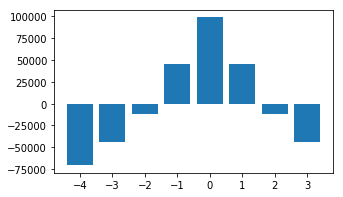

In [4]:
%matplotlib inline
n = 9 # sequence length
sequence = test_random_sequence(n)
product = product_function(sequence)
wigner =local_wigner_function(sequence)
y_pos = np.arange(-1*np.round_(len(wigner)/2),np.round_(len(wigner)/2))
plt.figure(figsize =(5,3))
plt.bar(y_pos, wigner, align='center', alpha=1)

## EXAMPLE 2

# Pseudo-Wigner distribution of a given image

**Step 1: Input test image**

Next code inputs a test images (e.g.:  'cameraman.png') and  shows it in a figure. Write your own path to your png image when required (color images are converted to gray for processing).


In [5]:
import os
os.path
cwd = os.getcwd()
print(cwd)

/home/nbuser/library


In [6]:
def input_test_image(subfolder,name):
    total_name = subfolder + name
    input_image = mpimg.imread(total_name) 
    image_dimension = len(input_image.shape)
    if image_dimension == 3:
        test_image = (1/3)*(input_image[:,:,0]+
                      input_image[:,:,1]+input_image[:,:,2])
    else:
        test_image = input_image
    
    # convert image to regular gray levels 
    test_image =np.uint8(255*test_image)
    return test_image

    

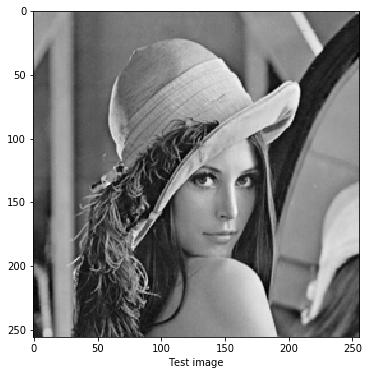

In [7]:
%matplotlib inline
# input test image
test_image = input_test_image('','lena_color.png')

# show image version to be processed 
plt.figure(figsize =(6,6))
plt.imshow(test_image, cmap='gray')
plt.xlabel("Test image")
plt.show()

We need to build a function to compute the Wigner distribution of the image. The input required parameters for such WD computation are: the test image, the number of pixel in the operational 1D window and the algular orientation over the window. 

The following code takes account of the orientation of the pixels in the operational window for the Wigner distribution computation.


In [8]:
def oriented_pattern(seq_length,angle):
    """
    This function originates a pattern that is later used for the orientation of the operational pseudo-Wigner distribution
    computation window
    seq_length: sequence length in pixels, angle: orientation in degrees
    """
    angle = np.mod(angle,180)
    # correction to set axes in the image (x: rows, y: columns) to observer cartesian coordinates x,y
    angle = np.mod((angle+90),180)
    angle =math.radians(angle)
    pi = math.pi
    h = int((seq_length/2))
    values = np.r_[float(-h):float(h+1)]
    new_positions = np.zeros([2*h+1, 2])
    for position in range(seq_length):
        if angle >= 0 and angle < pi/4:
            new_positions[position,0] = values[position]+h
            new_positions[position,1] = values[position]*math.tan(angle)+h
        elif angle >= pi/4 and angle < pi/2:
            new_positions[position,0] = values[position]*math.tan(pi/2-angle)+h
            new_positions[position,1] = values[position]+h
        elif angle >= pi/2 and angle < 3*pi/4:
            new_positions[position,0] = values[position]*math.tan(pi/2-angle)+h
            new_positions[position,1] = values[position]+h
        elif angle >= 3*pi/4 and angle <= pi:
            new_positions[position,0] = 1*values[position]+h
            new_positions[position,1] = values[position]*math.tan(angle)+h
        new_points = np.round_(new_positions)
    return new_points.astype(int)


These lines of code illustrate the arrangement of pixels in the window

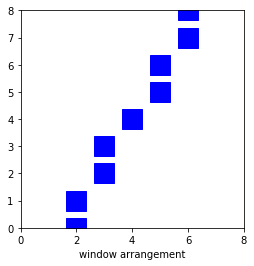

In [9]:
seq_length = 9
angle = 60
# correction to set axes in the image (x: rows, y: columns) to observer cartesian coordinates x,y
angle = np.mod((angle+90),180)
indices = oriented_pattern(seq_length,angle)
plt.figure(figsize=(4,4))
plt.plot(indices[:,0],indices[:,1],"sb",markersize=20)
plt.xlabel("window arrangement")
plt.xlim(0, seq_length-1) 
plt.ylim(0, seq_length-1)
plt.show()


An image of MxM pixels originates a discrete pseudo-Wigner distribution of MxMxN values (N is the size of the 1D operational window for calculating the PWD). We can organize this data in N matrices of MxM elements and show them as N images.

In [10]:


def wigner_distribution(test_image,seq_length,angle): # seq_length must be an odd number
    """
    This application calculates the  1D pseudo-Wigner distribution of test_image image (in gray levels) , seq_length
    is the length in pixels of the operating window and it has to be an odd number (9 is a common operative value). 
    The angle variable in degrees determines the spatial orientation of the distribution.
    """
    print("calculating ...")
    # change test image to float
    test_image = np.float64(test_image)
    # determine image shape
    rows = test_image.shape[0]
    columns = test_image.shape[1]
    # determine h pixels to frame the image
    h = int((seq_length/2))
    # determine framing background image
    frame = np.ones([rows+2*h,columns+2*h])
    # insert image into the frame
    frame[h:rows+h,h:columns+h] = test_image      
    # initial wigner distribution of test image        
    distribution = np.ones([2*h,rows,columns])
    # calculations
    for row in range(h,rows+h):
        if np.mod(row,100) == 0:
            print("calculating in row ",row," ...")
            
        for column in range(h,columns+h):
            working_frame = frame[row-h:row+h+1,column-h:column+h+1]
            local_copy = working_frame.copy()
            indices = oriented_pattern(seq_length,angle)
            sequence = np.zeros(seq_length)
            for k in range(seq_length):
                sequence[k] = local_copy[indices[k,0],indices[k,1]] 
            wigner = local_wigner_function(sequence)
            distribution[:,row-h,column-h] = wigner
    return distribution

def show_wigner_frequencies(distribution):
    """
    Starting from the pseudo-Wigner distribution (distribution) of the input test image, this function gives a
    visualization of the n frequency components of such distribution and images are saved in pdf's
    """
    rows = distribution.shape[1]
    columns = distribution.shape[2]
    layers = distribution.shape[0]
    frequencies = np.zeros([layers,rows,columns])
    for layer in range(layers):
        frequency = distribution[layer,:,:]
        min_val =np.amin(frequency)
        frequency = frequency - min_val
        max_val = np.amax(frequency)
        frequency = (1/max_val)*frequency
        plt.figure()
        frequency = np.uint8(255*frequency)
        #plt.imshow(frequency, interpolation='nearest',cmap='gray')
        plt.imshow(frequency,cmap='gray')
        name = "wigner_distribution_" + str(layer) + ".pdf"
        msg = "Wigner distribution, frequency #" + str(layer)
        plt.xlabel(msg)
        plt.savefig(name)
        frequencies[layer,:,:]= frequency
    return frequencies 


**Step 2: Calculating the pseudo-Wigner distribution of the input image**

Now we can calculate the local Wigner distribution of the input image as matrix (i,j,k), where i,j are the spatial 
coodinates and k is the frequency coordinate. The whole distribution is shown by a set of images, one for each 
frequency level (Color images are previously converted to gray for processing). Results are saved as pdf's when running the next cell.


calculating ...
calculating in row  100  ...
calculating in row  200  ...


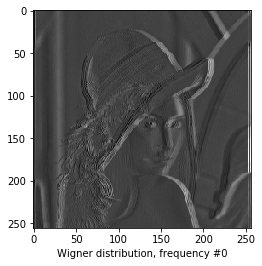

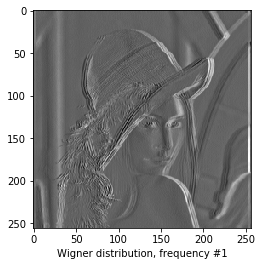

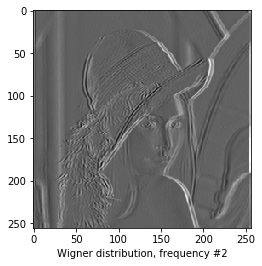

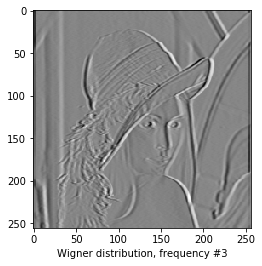

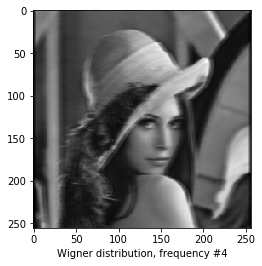

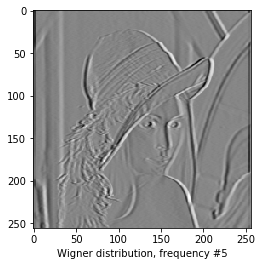

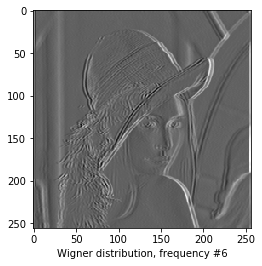

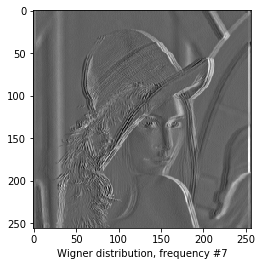

In [11]:
%matplotlib inline
# calculating the Wigner distribution
seq_length = 9 # optional odd value for the 1D wigner window
angle = 0 # optional value in degrees for 1D wigner window orientation
distribution = wigner_distribution(test_image,seq_length,angle)
# show distribution as a set of images
frequencies = show_wigner_frequencies(distribution)